# Temperature exploration

### In this data set: 
temp_station = ground-based temperature measurements

temp_ERA = satellite temperature measurements

All in degrees C

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
import statsmodels.api as sm
from pandas import tseries

/home/alana/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir(os.path.join('/home', 'alana', 'Dropbox', 'dissertation', 'model_comparison', 'model_inputs'))
os.getcwd()

# import temp data from Kyanjing, 3924 m
Ky = pd.read_excel('seasonal_temp_differences_ERA_vs_met_station.xlsx', sheetname = 'all_year')

# import temp data from Dhunche, 1982 m
Dh = pd.read_excel('Dhunche_AWS_data_2010_2014.xlsx', sheetname='all_year')

# import temp data from Yala, 5100 m
Ya = pd.read_excel('Yala_aws_ERA_interpolated_comparison.xlsx')

# drop extraneous columns
Ky = Ky.drop('Temp_ERA_Interim_interpolated', axis=1)
Dh = Dh.drop('DOY', axis=1)

# create pandas datetime objects and day of year (doy) 
# column for each dataframe
Ky['Date'] = pd.to_datetime(Ky['Date'])
Ky["doy"] = Ky.Date.dt.strftime('%j')
Ya["doy"] = Ya.Date.dt.strftime('%j')
Dh["doy"] = Dh.date.dt.strftime('%j')

# create consistent column names
Ya.rename(columns={'aws_temp': 'temp_station', 'ERA': 'temp_ERA'}, inplace=True)
Dh.rename(columns={'dhun_Tmean': 'temp_station', 'ERA': 'temp_ERA'}, inplace=True)

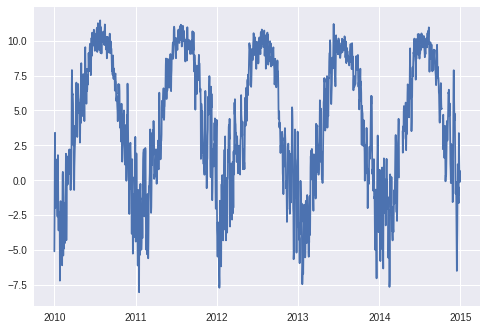

In [3]:
# Look at station data for Ky (3924 m)
plt.plot(Ky.Date, Ky.temp_station)
plt.show()

In [4]:
# create pandas groupby objects for day of year (doy)
# this aggregates temperature data for full time series by doy

Ky.Date = pd.to_datetime(Ky.Date)
Ky = Ky.groupby('doy')

Ya.Date = pd.to_datetime(Ya.Date)
Ya = Ya.groupby('doy')

In [5]:
# Pick a station to plot and uncomment corresponding metadata

data = Ya

# station = 'Dhunche'
# elevation = '1982'
# years = 5

# station = 'Kyanjing'
# elevation = '3924'
# years = 5

station = 'Yala'
elevation = '5100'
years = 2

In [6]:
# Create an aggregated data frame that takes temperature means by doy
# start with station data
agg = data.agg({'temp_station':np.mean})

In [7]:
# Add temp_ERA (satellite data) to agg dataframe
agg['temp_ERA'] = data.agg({'temp_ERA':np.mean})

In [8]:
agg.head()
agg = agg.reset_index()

In [9]:
# Generate 30 day rolling mean for temperatures

agg['rs'] = agg.temp_station.rolling(window=30, center=True, min_periods=1).mean()    
agg['re'] = agg.temp_ERA.rolling(window=30, center=True, min_periods=1).mean() 

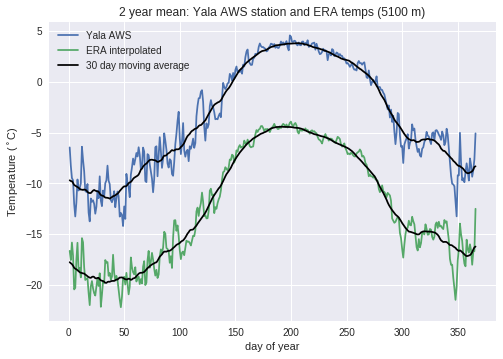

In [10]:
# Look at difference in doy means between station & satellite
plt.plot(agg.doy, agg.temp_station, label = '%s AWS'%(station))
plt.plot(agg.doy, agg.temp_ERA, label = 'ERA interpolated')
plt.plot(agg.doy, agg.rs, label='30 day moving average', color='black')
plt.plot(agg.doy, agg.re, label='_nolegend_', color='black')
plt.xlabel('day of year')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.title('%s year mean: %s AWS station and ERA temps (%s m)'%(years, station, elevation))
plt.show()

In [11]:
# station temps minus satellite temps
agg["difference"] = (agg.rs - agg.re)

In [12]:
# mean difference over the year:
agg.difference.mean()

8.796927275623885

In [13]:
# read in all difference files
Ya_diff = pd.read_csv('Yala_difference.csv')
Ky_diff = pd.read_csv('Kyanjing_difference.csv')
Dh_diff = pd.read_csv('Dhunche_difference.csv')

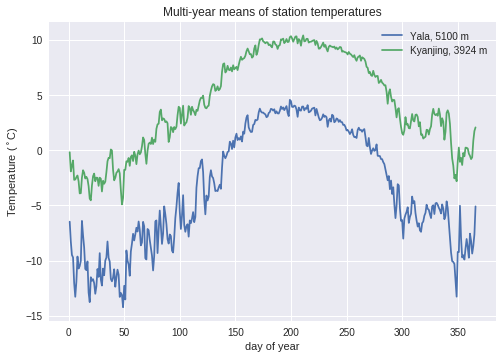

In [14]:
# plot multi-year means of all stations
plt.plot(Ya_diff.doy, Ya_diff.temp_station, label='Yala, 5100 m')
plt.plot(Ky_diff.doy, Ky_diff.temp_station, label='Kyanjing, 3924 m')
plt.xlabel('day of year')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Multi-year means of station temperatures')
plt.legend()
plt.show()

## Look at the differences (bias between station data & satellite data)

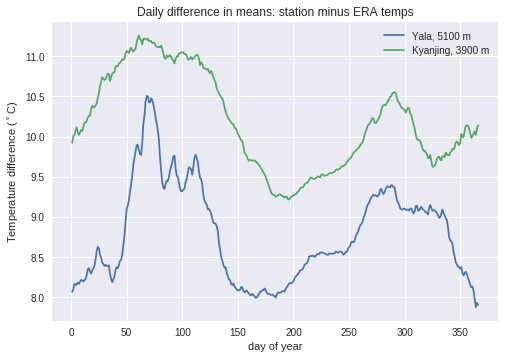

In [15]:
plt.plot(Ya_diff.doy, Ya_diff.difference, label='Yala, 5100 m')
plt.plot(Ky_diff.doy, Ky_diff.difference, label='Kyanjing, 3900 m')
# plt.plot(Dh_diff.doy, Dh_diff.difference, label='Dhunche, 1900 m')
plt.xlabel('day of year')
plt.ylabel('Temperature difference ($^\circ$C)')
plt.title('Daily difference in means: station minus ERA temps')
plt.legend()
plt.show()

In [16]:
# Look at correlations between the biases at different stations:

In [17]:
Ky_diff.temp_station.corr(Ya_diff.temp_station)

0.9752505727259051

In [18]:
Ky_diff.temp_station.corr(Dh_diff.temp_station)

0.93458266523591083

In [19]:
Dh_diff.temp_station.corr(Ya_diff.temp_station)

0.90088914042786417

In [20]:
# Dh.to_csv('Dhunche_comparison.csv')
# Ya.to_csv('Yala_comparison.csv')